In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("Medals.xlsx")

C:\Users\Lenovo\.conda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
data.head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


In [5]:
data.tail(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
83,84,Mexico,0,0,4,4,47
84,85,Finland,0,0,2,2,66
85,86,Botswana,0,0,1,1,77
86,86,Burkina Faso,0,0,1,1,77
87,86,Côte d'Ivoire,0,0,1,1,77
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77
92,86,Syrian Arab Republic,0,0,1,1,77


In [6]:
data.shape

(93, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [8]:
data["Team/NOC"].replace({"People's Republic of China":"China","United States of America":"USA","Great Britain":"UK"}, inplace = True) 

In [9]:
data.head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,USA,39,41,33,113,1
1,2,China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,UK,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


In [10]:
data.rename({"Team/NOC":"Country"},axis = 1 , inplace = True)
data.head(10)

,Rank,Country,Gold,Silver,Bronze,Total,Rank by Total
0,1,USA,39,41,33,113,1
1,2,China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,UK,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


In [11]:
data.columns

Index(['Rank', 'Country', 'Gold', 'Silver', 'Bronze', 'Total',
       'Rank by Total'],
      dtype='object')

In [12]:
top10_country_gold_medals = data.loc[:9,"Country":"Gold"]
top10_country_gold_medals

,Country,Gold
0,USA,39
1,China,38
2,Japan,27
3,UK,22
4,ROC,20
5,Australia,17
6,Netherlands,10
7,France,10
8,Germany,10
9,Italy,10


In [18]:
top10_country_total_medals = data.loc[:9,("Country","Total")]
top10_country_total_medals

,Country,Total
0,USA,113
1,China,88
2,Japan,58
3,UK,65
4,ROC,71
5,Australia,46
6,Netherlands,36
7,France,33
8,Germany,37
9,Italy,40


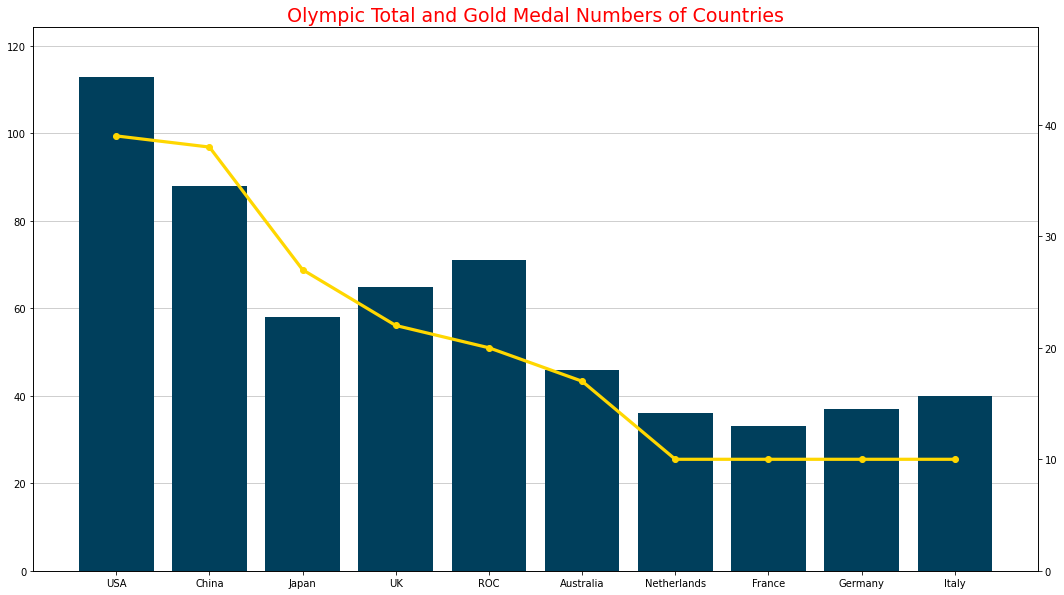

In [94]:
plt.figure(figsize=(18,10))
ax1 = plt.subplot(1,1,1) # 1 row, 1columns 
ax1.bar(top10_country_total_medals.Country,top10_country_total_medals.Total, color = "#003f5c")
ax1.set_ylim(0,top10_country_total_medals.Total.max() * 1.1)
ax1.yaxis.grid(linestyle="-",linewidth = 0.6)
ax1.set_axisbelow(True)
ax2 = ax1.twinx()
ax2.plot(top10_country_gold_medals.Country,top10_country_gold_medals.Gold, "o-" ,
         color = "Gold" , linewidth = 3.2)
ax2.set_ylim(0,top10_country_gold_medals.Gold.max() * 1.25)
plt.title("Olympic Total and Gold Medal Numbers of Countries",fontsize = 19 , color = "Red")
plt.show()